In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generate synthetic dataset
We create a target that is a non-linear function of the input feature.

Noise following a standard uniform distribution is added.

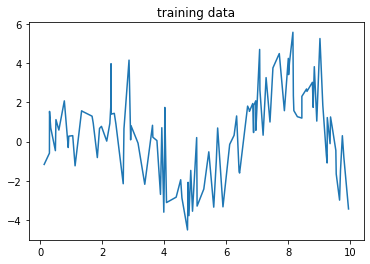

In [97]:
rng = np.random.RandomState(42)

num_samples = 110

X = rng.rand(num_samples)
# sort the X for plotting purpose
X = np.sort(-10*X + 10)

noise = rng.normal(0, 1, num_samples) * 1.5

y = np.sqrt(X) * np.sin(X) + noise

full_data = pd.DataFrame({"input_feature": X, "target": y})

plt.plot(X, y);  # this is our training data
plt.title('training data');

In [35]:
# extraplotion

x_extra = np.linspace(10, 11, 10)
y_extra = np.sqrt(x_extra) * np.sin(x_extra)


In [84]:
X = X.reshape((-1, 1))   #shape (110, 1)

X_ = np.concatenate([ X, x_extra.reshape(-1,1)])

# remove the noise
y_ = np.concatenate([y-noise, y_extra])   

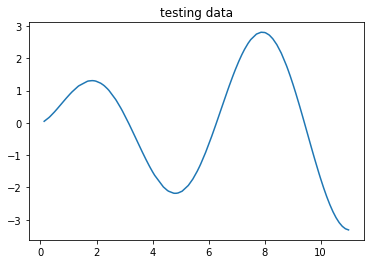

In [99]:
plt.plot(X_, y_);  # this is our testing data
plt.title('testing data');

## Fit the regressor

Here we try a degree 10 polynomial to potentially overfit,though the bayesian linear models regularize the size of the polynomial coefficients.

As `fit_intercept=True` by default for ARDRegression and BayesianRidge, then PolynomialFeatures should not introduce an additional bias feature.

By setting `return_std=True`, the bayesian regressors return the standard deviation of the posterior distribution for the model parameters.

In [86]:
from sklearn.linear_model import ARDRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline


bayes_pipe = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    BayesianRidge()
).fit(X, y)

ard_pipe = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    ARDRegression()
).fit(X, y)

In [87]:
# prediction
bayes_preds, bayes_std = bayes_pipe.predict(X_, return_std=True)
ard_preds, ard_std = ard_pipe.predict(X_, return_std=True)

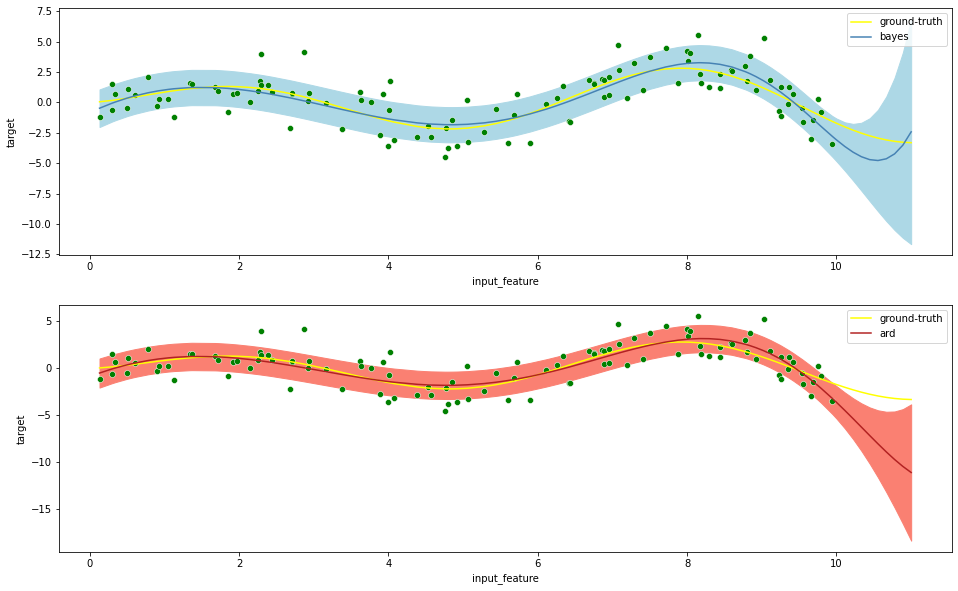

In [95]:
# plots
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
plt.plot(X_, y_, color='yellow', label='ground-truth')
plt.plot(X_, bayes_preds, label='bayes', color='steelblue')
plt.fill_between(X_.reshape(-1), bayes_preds-bayes_std, bayes_preds+bayes_std, color='lightblue')
sns.scatterplot(x='input_feature', y='target', data=full_data, color='green')
plt.legend() 

plt.subplot(2,1,2)
plt.plot(X_, y_, color='yellow', label='ground-truth')
plt.plot(X_, ard_preds, label='ard', color='firebrick')
plt.fill_between(X_.reshape(-1), ard_preds-ard_std, ard_preds+ard_std, color='salmon')
sns.scatterplot(x='input_feature', y='target', data=full_data, color='green')
plt.legend();

* ### Due to the intrinsic limitations of a polynomial regression, both models fail when extrapolating.
